<a href="https://colab.research.google.com/github/Pritesh-i6/ML/blob/main/Amazonreview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import string
import numpy as np #arrays
import pandas as pd #datasets

import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import seaborn as sns #visualization
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objects as go

from sklearn import metrics #ML Models
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading our data using pandas read_csv
data = pd.read_csv("/content/drive/MyDrive/AmazonKindle/preprocessed_kindle_review .csv")
df = data

In [ ]:
a=data.rating.value_counts()
a

5    3000
4    3000
1    2000
3    2000
2    2000
Name: rating, dtype: int64

Preprocessiong the data

In [ ]:
data.columns

Index(['Unnamed: 0', 'rating', 'reviewText', 'summary'], dtype='object')

In [ ]:
data = data.drop(['Unnamed: 0', 'summary'], axis=1)

In [ ]:
# preview of the dataset

data.head()

,rating,reviewText
0,5,This book was the very first bookmobile book I...
1,1,"When I read the description for this book, I c..."
2,5,I just had to edit this review. This book is a...
3,5,I don't normally buy 'mystery' novels because ...
4,5,"This isn't the kind of book I normally read, a..."


In [ ]:
# if rating is above 3 we will consider it as 1 else 0.

data["rating"] = data["rating"].apply(lambda x: 1 if x < 3  else 0) # positive as 0 and negative as 1
data

,rating,reviewText
0,0,This book was the very first bookmobile book I...
1,1,"When I read the description for this book, I c..."
2,0,I just had to edit this review. This book is a...
3,0,I don't normally buy 'mystery' novels because ...
4,0,"This isn't the kind of book I normally read, a..."
...,...,...
11995,1,Had to read certain passages twice--typos. Wi...
11996,0,Not what i expected. yet a very interesting bo...
11997,0,Dragon Knights is a world where Knights ride d...
11998,0,"Since this story is very short, it's hard to s..."


In [ ]:
# lowering the text of the review

data["reviewText"] = data["reviewText"].str.lower()
data.head()

,rating,reviewText
0,0,this book was the very first bookmobile book i...
1,1,"when i read the description for this book, i c..."
2,0,i just had to edit this review. this book is a...
3,0,i don't normally buy 'mystery' novels because ...
4,0,"this isn't the kind of book i normally read, a..."


In [ ]:
# removing punctuation

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

data["reviewText"] = data["reviewText"].apply(lambda text: remove_punctuation(text))
data.head()

,rating,reviewText
0,0,this book was the very first bookmobile book i...
1,1,when i read the description for this book i co...
2,0,i just had to edit this review this book is an...
3,0,i dont normally buy mystery novels because i j...
4,0,this isnt the kind of book i normally read alt...


In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')  # Download the Punkt tokenizer models
nltk.download('stopwords')  # Download stopwords data
nltk.download('wordnet') #lemmatizer
nltk.download('averaged_perceptron_tagger') #perception of words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
#removing stop words from the dataset

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data["reviewText"] = data["reviewText"].apply(lambda text: remove_stopwords(text))
data.head()

,rating,reviewText
0,0,book first bookmobile book bought school book ...
1,1,read description book couldnt wait read downlo...
2,0,edit review book believe got right updated rew...
3,0,dont normally buy mystery novels dont like how...
4,0,isnt kind book normally read although try limi...


In [ ]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

data["reviewText"] = data["reviewText"].apply(lambda text: lemmatize_words(text))
data.head()

,rating,reviewText
0,0,book first bookmobile book buy school book clu...
1,1,read description book couldnt wait read downlo...
2,0,edit review book believe get right update rewr...
3,0,dont normally buy mystery novels dont like how...
4,0,isnt kind book normally read although try limi...


Visualization on Dataset

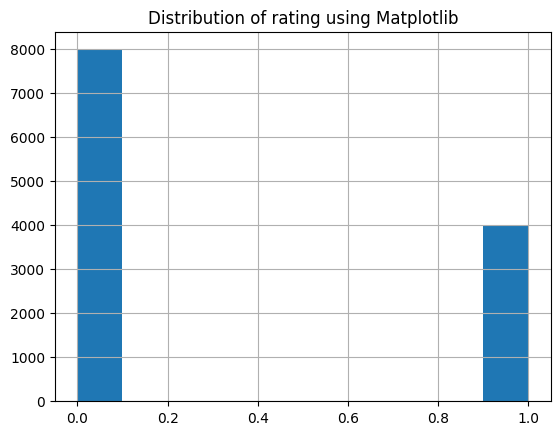

In [ ]:
# PLotting Rating histogram

data.rating.hist()
plt.title("Distribution of rating using Matplotlib")
plt.show()

In [ ]:
# PLotting Rating using ploty
a  = data.rating.value_counts()
fig = go.Figure([go.Bar(x=a.index, y=a.values,text=a.values)])
fig.update_layout(title='Distribution of the Rating using ploty')
fig.show()

In [ ]:
# Plotting word cloud

In [ ]:
text = " ".join(cat.split()[0] for cat in data.reviewText)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

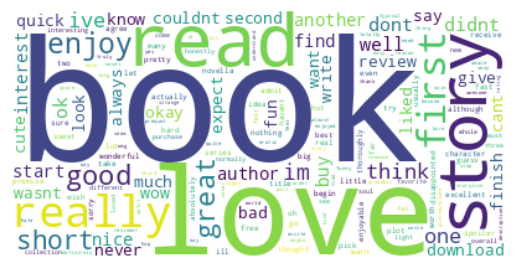

In [ ]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from collections import Counter
cnt = Counter()
for text in data["reviewText"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(15)

[('book', 15397),
 ('story', 11027),
 ('read', 10023),
 ('like', 6207),
 ('one', 5949),
 ('character', 5677),
 ('get', 5453),
 ('love', 5059),
 ('good', 4763),
 ('would', 4093),
 ('really', 3842),
 ('make', 3637),
 ('time', 3588),
 ('author', 3496),
 ('go', 3411)]

In [ ]:
cnt.get("book")

15397

In [ ]:
cn = cnt.most_common(10)
w = []
c = []

In [ ]:
for i in cn:
    w.append(i[0])
    c.append(i[1])

Pie chart for Most Frequent Words

In [ ]:
fig = px.pie(data, values=c, names=w, color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title="Most Frequent Words")
fig.show()

Displaying Rarewords

In [ ]:
n_rare_words = 11
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
RAREWORDS

{'1922',
 'backgroung',
 'don8216t',
 'firedrake',
 'gryphon',
 'helos',
 'insite',
 'meaness',
 'relm',
 'symbols',
 'twicetypos'}

Splitting the data

In [ ]:
# preview of data

data

,rating,reviewText
0,0,book first bookmobile book buy school book clu...
1,1,read description book couldnt wait read downlo...
2,0,edit review book believe get right update rewr...
3,0,dont normally buy mystery novels dont like how...
4,0,isnt kind book normally read although try limi...
...,...,...
11995,1,read certain passage twicetypos wish build rel...
11996,0,expect yet interesting book usually don8216t r...
11997,0,dragon knight world knight ride dragon slay wi...
11998,0,since story short hard say much without give a...


In [ ]:
train, test = train_test_split(data, test_size = 0.01, stratify = data['rating'], random_state = 32)

In [ ]:
cv= CountVectorizer(binary=True, min_df = 10, max_df = 0.95)
cv.fit_transform(train['reviewText'].values)
train_feature_set=cv.transform(train['reviewText'].values)
test_feature_set=cv.transform(test['reviewText'].values)

In [ ]:
train_feature_set

<11880x4713 sparse matrix of type '<class 'numpy.int64'>'
	with 461887 stored elements in Compressed Sparse Row format>

In [ ]:
train_feature_set.shape[1]

4713

In [ ]:
cv.vocabulary_['book']

511

In [ ]:
y_train = train['rating'].values
y_test = test['rating'].values

Building our Model

In [ ]:
lr = LogisticRegression(random_state = 32, max_iter=1000)
lr.fit(train_feature_set,y_train)
y_pred = lr.predict(test_feature_set)
print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))
print("F1: ",round(metrics.f1_score(y_test, y_pred),3))

Accuracy:  0.892
F1:  0.835


In [ ]:
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[713,  87],
       [106, 294]])

In [ ]:
cm2 = confusion_matrix(y_test, y_pred,normalize='true')
cm2

array([[0.89125, 0.10875],
       [0.265  , 0.735  ]])

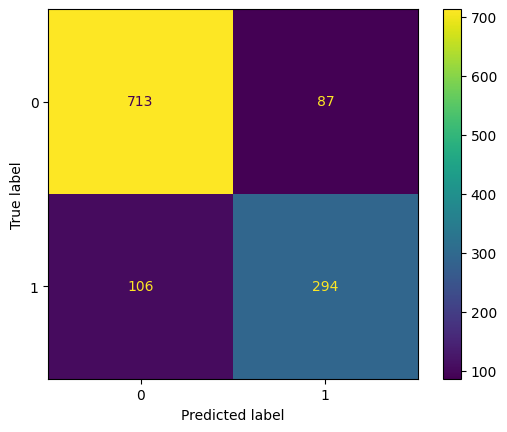

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=lr.classes_)
disp.plot()
plt.show()

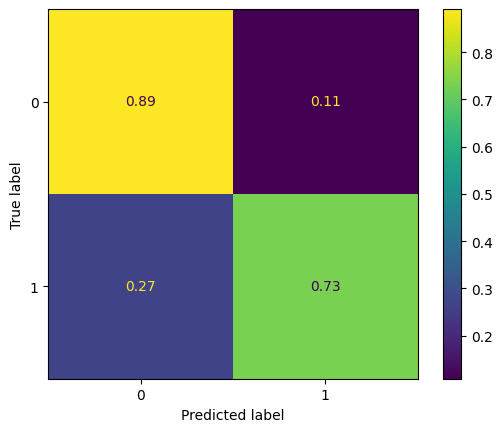

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=lr.classes_)
disp.plot()
plt.show()

In [ ]:
feature_importance = lr.coef_[0][:10]
for i,v in enumerate(feature_importance):
    print('Feature: ', list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(i)], 'Score: ', v)

Feature:  099 Score:  0.5327452356891613
Feature:  10 Score:  0.47470948934755625
Feature:  100 Score:  0.2778364163674725
Feature:  11 Score:  -0.2541365181977893
Feature:  12 Score:  0.2226305388444963
Feature:  13 Score:  0.804384948896927
Feature:  14 Score:  -0.47882444939882535
Feature:  15 Score:  0.7598581550199074
Feature:  16 Score:  0.6419486438571071
Feature:  17 Score:  0.15335261886709686


In [ ]:
feature_importance = lr.coef_[0]
sorted_idx = np.argsort(feature_importance)

Top words for the positive class (negative sentiment):

In [ ]:
top_10_pos_w = [list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(w)] for w in sorted_idx[range(-1,-11, -1)]]
print(top_10_pos_w)

['waste', 'lame', 'depress', 'cardboard', 'le', 'option', 'file', 'sadly', 'delete', 'sorry']


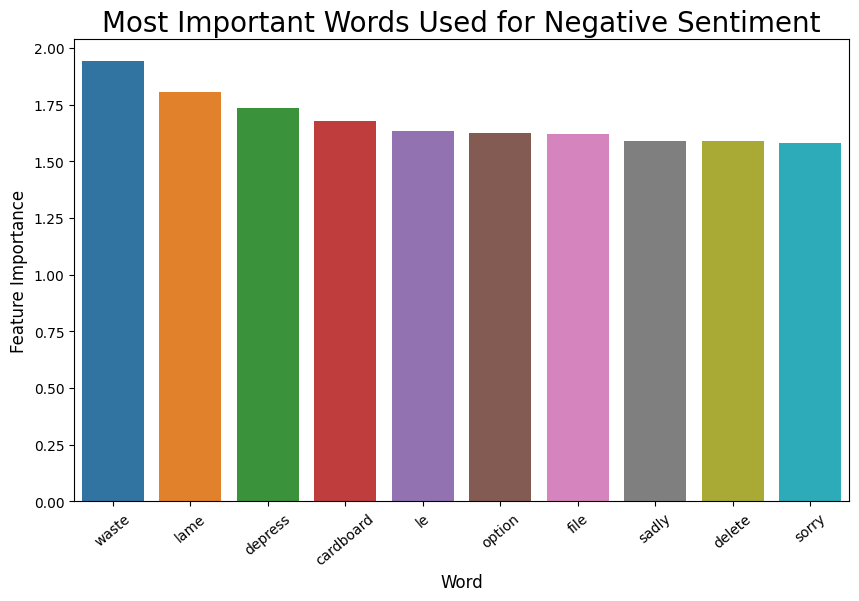

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_pos_w, y=feature_importance[sorted_idx[range(-1,-11, -1)]])
plt.title("Most Important Words Used for Negative Sentiment",fontsize = 20)
x_locs,x_labels = plt.xticks()
plt.setp(x_labels, rotation = 40)
plt.ylabel('Feature Importance', fontsize = 12)
plt.xlabel('Word', fontsize = 12);

Top words for the negative class (positive sentiment):

In [ ]:
top_10_neg_w = [list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(w)] for w in sorted_idx[:10]]
print(top_10_neg_w)

['enjoyed', 'verne', 'hospital', 'enjoyable', 'weave', 'fun', 'pleasantly', 'loved', 'hunter', 'lacked']


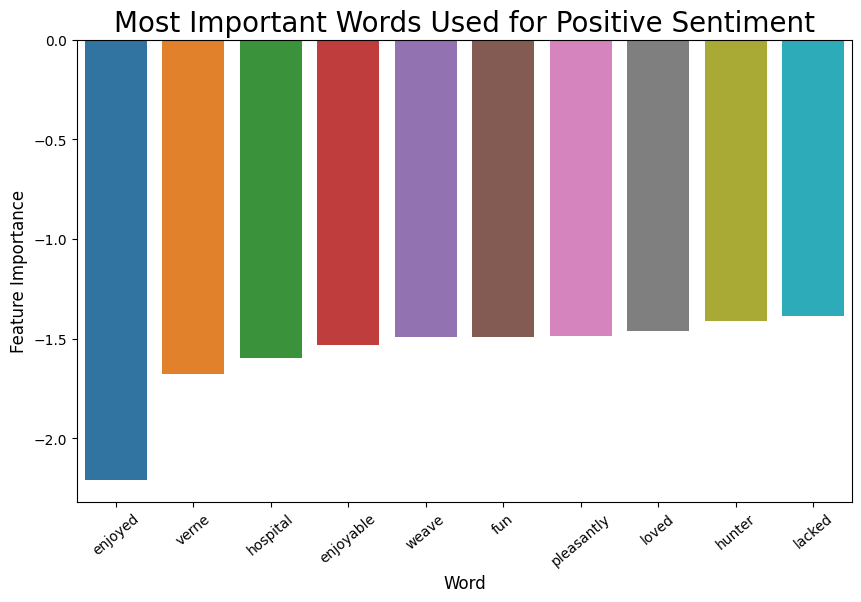

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_neg_w, y=feature_importance[sorted_idx[:10]])
plt.title("Most Important Words Used for Positive Sentiment",fontsize = 20)
x_locs,x_labels = plt.xticks()
plt.setp(x_labels, rotation = 40)
plt.ylabel('Feature Importance', fontsize = 12)
plt.xlabel('Word', fontsize = 12);

Prediction on our sentences

In [ ]:
lr.classes_#negative class first, positive class next

array([0, 1])

In [ ]:
test_review = cv.transform(["I did not enjoy the book"])
p = lr.predict_proba(test_review)
s = lr.predict(test_review)
print("prob are:",p)
print("prediction are:",s)

prob are: [[0.79367788 0.20632212]]
prediction are: [0]


Hyperparameter

In [ ]:
pred_proba_df = pd.DataFrame(lr.predict_proba(test_feature_set))
threshold_list = [0.3,0.4,0.45,0.5]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_f1 = round(metrics.f1_score(y_test, Y_test_pred.loc[:,1].values),3)
    print('F1: {}'.format(test_f1))


******** For i = 0.3 ******
F1: 0.795

******** For i = 0.4 ******
F1: 0.84

******** For i = 0.45 ******
F1: 0.825

******** For i = 0.5 ******
F1: 0.835
